In [1]:
# Convolutional Neural Network

# Importing the Keras libraries and packages
from keras.models import Sequential        #Sequential model is used for neural network
from keras.layers import Conv2D            #this 2d is for images
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution Operation
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#(No. of filters, No. of rows, No. of columns, Shape of images, Activation Function)
#No. of filters = Take less if u work on CPU 
#No. of Rows = Most of the time its 3
#No. of Columns = Most of the time its 3
'''Shape of Images = first 2 arguments are pixel, take less if work on CPU and last
                     argument is based on image color if black & white use 2 and if it
                     is colored use 3'''
#Activation Function = relu stands for rectifier function used for non-linearity

'Shape of Images = first 2 arguments are pixel, take less if work on CPU and last\n                     argument is based on image color if black & white use 2 and if it\n                     is colored use 3'

In [4]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Downloads/image_dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Downloads/image_dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [13]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/1
8000/8000 [==============================] - 4716s 589ms/step - loss: 0.3886 - acc: 0.8151 - val_loss: 0.5554 - val_acc: 0.7900


In [14]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('C:/Users/Dell/Downloads/dog1.jpg')

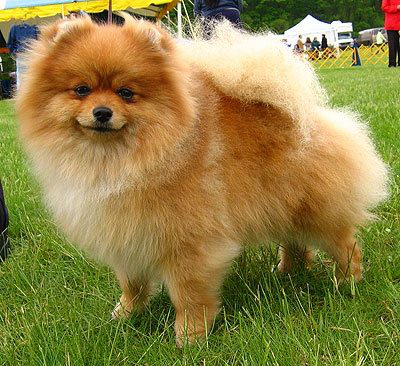

In [15]:
img

In [16]:
x = img_to_array(img.resize([64,64]))
x = x.reshape((1,) + x.shape)
if (classifier.predict_classes(x)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a DOG


In [19]:
img1 = load_img('C:/Users/Dell/Downloads/cat2.jpg')

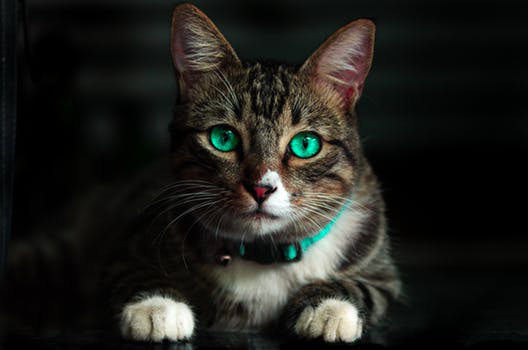

In [20]:
img1

In [21]:
x1 = img_to_array(img1.resize([64,64]))
x1 = x1.reshape((1,) + x1.shape)
if (classifier.predict_classes(x1)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a Cat


In [34]:
img2 = load_img('C:/Users/Dell/Downloads/cat1.jpg')

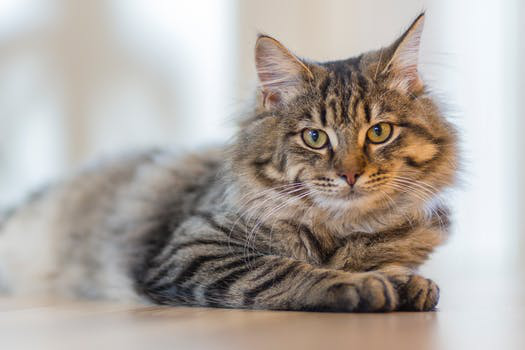

In [35]:
img2

In [36]:
x2 = img_to_array(img2.resize([64,64]))
x2 = x2.reshape((1,) + x2.shape)
if (classifier.predict_classes(x2)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a Cat


In [40]:
img3 = load_img('C:/Users/Dell/Downloads/dog2.jpg')

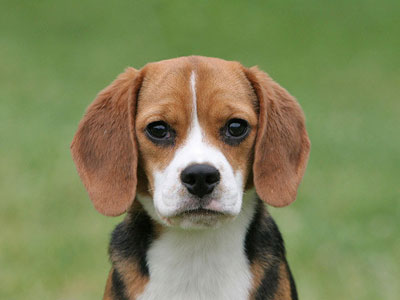

In [41]:
img3

In [42]:
x3 = img_to_array(img3.resize([64,64]))
x3 = x3.reshape((1,) + x3.shape)
if (classifier.predict_classes(x3)==1):
    print ("It is a DOG")
else:
    print ("It is a Cat")



It is a DOG
